# Code for Figures

[Download the notebook](https://github.com/neuro4ml/neuro4ml.github.io/blob/main/materials/w9/w9-figures.ipynb)
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/neuro4ml/neuro4ml.github.io/blob/main/materials/w9/w9-figures.ipynb)

In [5]:
!pip install brian2 -q
from brian2 import *
from scipy.ndimage import gaussian_filter
from numpy.random import poisson

## Digital versus analogue transmission

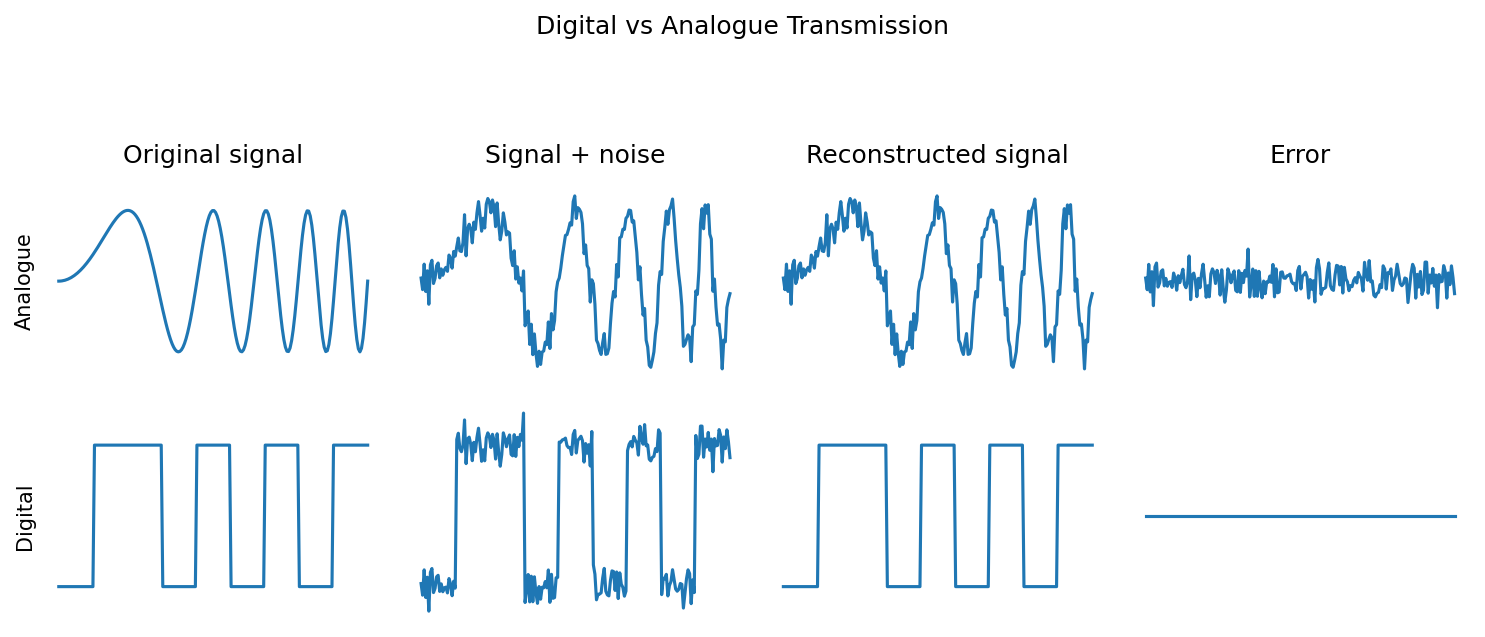

In [6]:
#| label: analogvdig-graph

t = linspace(0, 1, 200)

binary_signal = array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1])

analogue_signal = sin(2*pi*t**2*5)
noise = randn(t.size)*0.15
digital_signal = binary_signal[array(t*(len(binary_signal)-1), dtype=int)]*2-1

figure(figsize=(10, 4), dpi=150)
suptitle('Digital vs Analogue Transmission', y=1.05)  # Adjust the y position as needed
subplots_adjust(top=0.8)  # Adjust the top margin to make room for the title

subplot(2, 4, 1)
plot(t, analogue_signal)
ylabel('Analogue')
title('Original signal')

subplot(2, 4, 2)
plot(t, analogue_signal+noise)
title('Signal + noise')

subplot(2, 4, 3)
plot(t, analogue_signal+noise)
title('Reconstructed signal')

subplot(2, 4, 4)
plot(t, noise)
title('Error')

subplot(2, 4, 5)
plot(t, digital_signal)
ylabel('Digital')

subplot(2, 4, 6)
plot(t, digital_signal+noise)

subplot(2, 4, 7)
plot(t, ((digital_signal+noise) > .5)*2.0-1)

subplot(2, 4, 8)
plot(t, ((digital_signal+noise) > .5)*2.0-1-digital_signal)

for i in range(1, 9):
    subplot(2, 4, i)
    xticks([])
    ylim(-1.5, 1.5)
    yticks([])
    gca().set_frame_on(False)

tight_layout(rect=[0, 0, 1, 0.95])

## Spike versus rate time constant

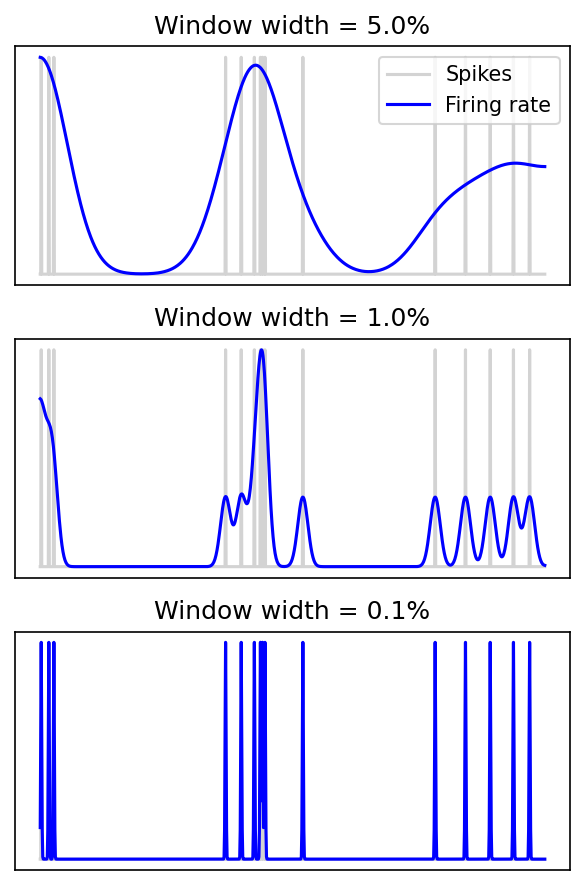

In [7]:
t = linspace(0, 1, 1000)
st = rand(15)
idx_st = array(st/(t[1]-t[0]), dtype=int)
x = zeros_like(t)
x[idx_st] = 1
def normed_smoothed(sigma):
  y = gaussian_filter(x, sigma/(t[1]-t[0]))
  y = y/amax(y)
  return y
figure(figsize=(4, 6), dpi=150)
for i, sigma in enumerate([0.05, 0.01, 0.001]):
  subplot(3, 1, i+1)
  plot(t, x, c='lightgray', label='Spikes')
  plot(t, normed_smoothed(sigma), c='b', label='Firing rate')
  yticks([])
  if i==0:
    # ylabel('Firing rate')
    legend(loc='best')
  xticks([])
  title(f'Window width = {100*sigma}%')
tight_layout()

## Coincidence and rank code

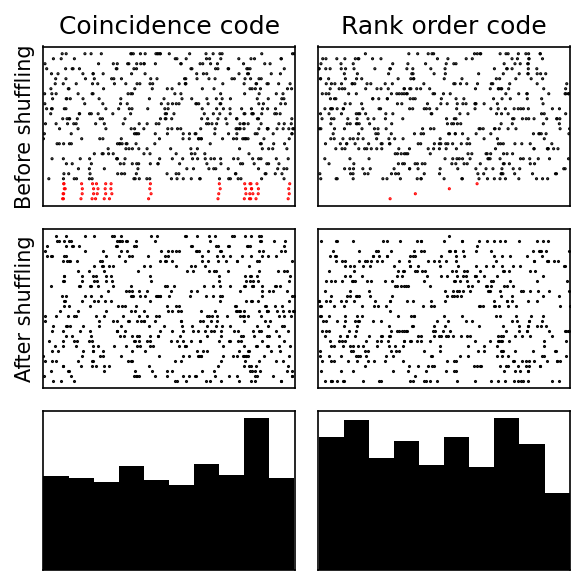

In [8]:
#| label: rank-graph
# Different codes
num_neurons = 30
num_active = 4
num_spikes_per_neuron = 20

def plotit(T, I, name, offset, width):
  s = arange(num_neurons)
  shuffle(s)

  ax = subplot(3, width, 1+offset)
  title(f'{name}')
  scatter(T, I, marker='.', c=['r' if i<num_active else 'k' for i in I], s=1);
  xticks([])
  yticks([])
  if offset==0:
    ylabel('Before shuffling')
  subplot(3, width, width+1+offset, sharex=ax)
  plot(T, s[I], '.k', ms=1)
  xticks([])
  yticks([])
  if offset==0:
    ylabel('After shuffling')
  subplot(3, width, width*2+1+offset, sharex=ax)
  hist(T, bins=10, fc='k')
  xlim(0, 1)
  xticks([])
  yticks([])

figure(figsize=(4, 4), dpi=150)

# Coincidence code
spiketrains = [rand(poisson(num_spikes_per_neuron)) for _ in range(num_neurons)]
for i in range(1, num_active):
  spiketrains[i] = spiketrains[0]+rand(len(spiketrains[0]))*0.01
I, T = zip(*[(i, t) for i in range(num_neurons) for t in spiketrains[i]])
I = array(I)
T = array(T)
plotit(T, I, 'Coincidence code', 0, 2)

# Order code
spiketrains = [rand(poisson(num_spikes_per_neuron)) for _ in range(num_neurons)]
for i in range(num_active):
  spiketrains[i] = array([0.4*rand()/num_active+0.5*i/num_active+0.25])
I, T = zip(*[(i, t) for i in range(num_neurons) for t in spiketrains[i]])
I = array(I)
T = array(T)
plotit(T, I, 'Rank order code', 1, 2)

tight_layout();